In [29]:
!pip install emoji
!pip install wordcloud
!pip install textblob
!pip install nltk
!pip install spacy
!pip install tensorflow

In [29]:
# Import libraries for Natural Languge Processing
import re
import spacy
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from collections import defaultdict

nltk.download('stopwords')
nltk.download('punkt')

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-v0_8-pastel')
style.use('seaborn-v0_8-pastel')
from PIL import Image
from wordcloud import WordCloud

import spacy
spacy.cli.download("en_core_web_sm")


# Downloads
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Preprocessing
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 


# Stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()
# for improved aesthetics
plt.style.use('ggplot')    

# Importing wordcloud for plotting word clouds and 
from wordcloud import WordCloud
# textwrap for wrapping longer text
from textwrap import wrap

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/da-m1-40/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/da-m1-40/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /Users/da-m1-40/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/da-m1-40/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/da-m1-40/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/da-m1-40/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
from nltk.corpus import wordnet as wn

# Download WordNet data if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/da-m1-40/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/da-m1-40/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
df = pd.read_csv(r"/Users/da-m1-40/Downloads/global-warming.csv")
df

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732


In [32]:
def remove_RT(df):
    """
        This function removes all the retweeted tweets before resampling so that we do not resample
        from already repeating tweets
    """
    df = df.copy()
    tweets = list(df['message'])
    New_tweets = []
    for tweet in tweets:
        if tweet not in New_tweets:
            New_tweets.append(tweet)
        else:
            New_tweets.append(None)
    df['message'] = New_tweets
    for twee in df['message']:
        if twee is None:
            ind = list(df['message']).index(twee)
            df.drop(df.index[ind], inplace = True)
    return df


In [33]:
from sklearn.utils import resample

def resambling(df):
    """
        The class size is a value between the size of the majority class and the size of the minority class.
        This function resamples by downsampling classes with observations greater than the class size and
        upsampling the classes with observations smaller than the class size.
    """
    df = df.copy()
    df = remove_RT(df)
    class_2 = df[df['sentiment'] == 2]  #upsampling
    class_1 = df[df['sentiment'] == 1]  #majority class
    class_0 = df[df['sentiment'] == 0]  #upsampling
    class_n1 = df[df['sentiment'] == -1]  #minority class
    class_size = int(((len(class_1)-len(class_n1))/2) + len(class_n1))
    #downsampling class 1
    rclass_1 = resample(class_1, replace=False, n_samples=class_size, random_state=27)
    #upsampling class 2
    rclass_2 = resample(class_2, replace=True, n_samples=class_size, random_state=27)
    #upsampling class 0
    rclass_0 = resample(class_0, replace=True, n_samples=class_size, random_state=27)
    #upsampling class -1
    rclass_n1 = resample(class_n1, replace=True, n_samples=class_size, random_state=27)
    dfsampled = pd.concat([rclass_2, rclass_1, rclass_0, rclass_n1])
    
    return dfsampled


In [34]:
Resampled_Train_DF = resambling(df)

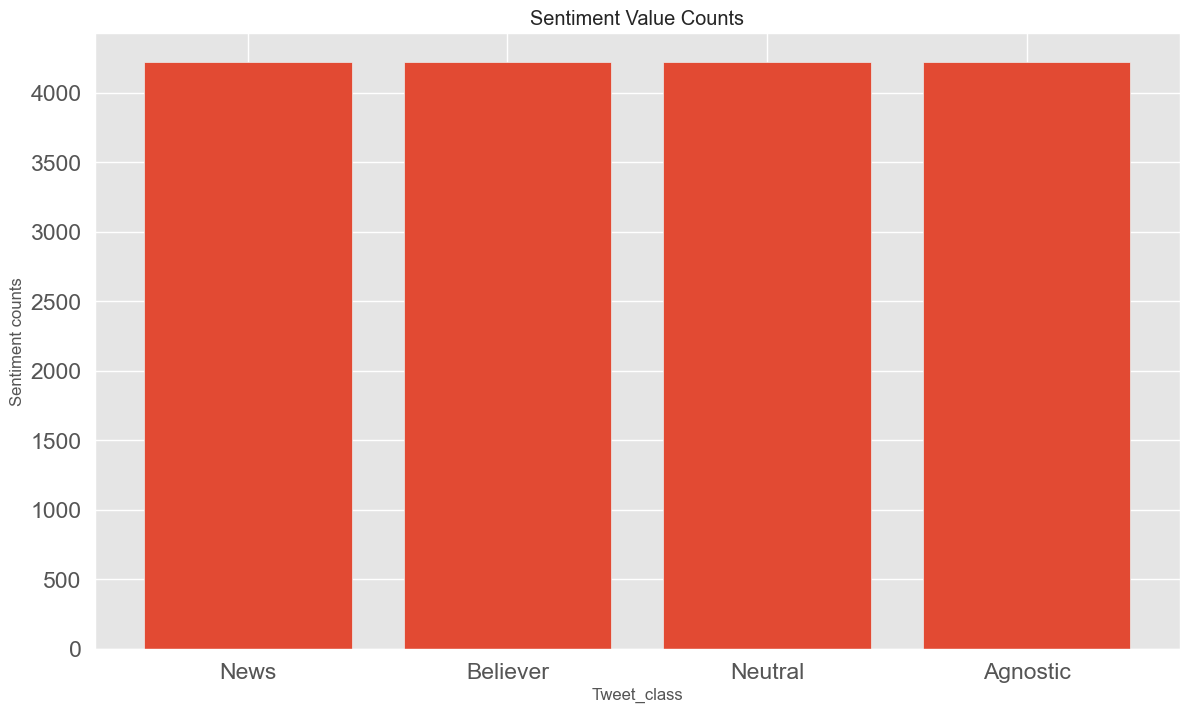

In [35]:

#A bar graph comparing the frequency of each class sentiment in resampled dataframe
news=Resampled_Train_DF[Resampled_Train_DF.sentiment == 2].shape[0]
pro =Resampled_Train_DF[Resampled_Train_DF.sentiment == 1].shape[0]
neutral=Resampled_Train_DF[Resampled_Train_DF.sentiment == 0].shape[0]
anti =Resampled_Train_DF[Resampled_Train_DF.sentiment == -1].shape[0]

#visualization
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Believer", "Neutral" , "Agnostic"],[news, pro, neutral , anti])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Sentiment Value Counts')
plt.show()

In [36]:
# This line of code counts the number of words in each tweet and add a column of those counts into the existing dataframe 

word_count = df['message'].apply(lambda x: len(x.split()))
df['word_count'] = word_count


In [37]:
# This line pf code counts the number of punctuation in each tweet then add the column of those counts into the existing dataframe

df['punct_count']  = df['message'].apply(lambda x: len([i for i in x if i in string.punctuation]))

In [38]:
df.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,19,12
1,1,It's not like we lack evidence of anthropogenic global warming,126103,10,1
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,19,12
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,15,8
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,18,8


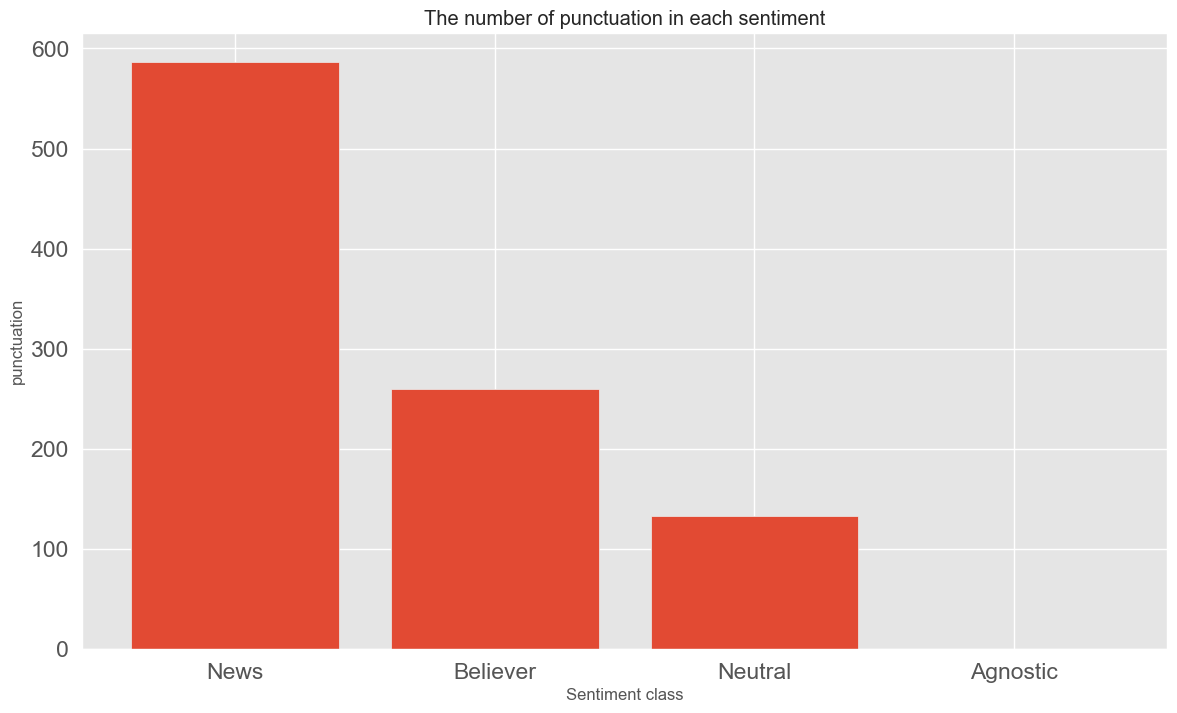

In [39]:
# A bar graph showing the number of punctuations as per class
# labling the classes
news=df[df.punct_count == 2].shape[0]
pro =df[df.punct_count == 1].shape[0]
neutral=df[df.punct_count == 0].shape[0]
anti =df[df.punct_count == -1].shape[0]

#plotting the graph and setting the axis labels
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Believer", "Neutral" , "Agnostic"],[news, pro, neutral , anti])
plt.xlabel('Sentiment class')
plt.ylabel('punctuation')
plt.title('The number of punctuation in each sentiment')
plt.show() #visualizing the graph

In [40]:
# A function that creates a corpus based on the target feature
def create_corpus(df,sentiment):
    """
    create corpus based on the target feature
    """
    list1 = []
    #appends each word from the messege to the list above and return the list
    for s in df[df["sentiment"]== sentiment].message.str.split():
        for i in s:
            list1.append(i)
    return list1  

In [41]:
#corpus created for each class
corpus2 = create_corpus(df=df, sentiment=2)
corpus1 = create_corpus(df=df, sentiment=1)
corpus0 = create_corpus(df=df, sentiment=0)
corpus3 = create_corpus(df=df, sentiment=-1)



d2= defaultdict(int)
for word in corpus2:
    if word in stop:
        d2[word]+=1
        
d1 =defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word]+=1
    
d0= defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word]+=1
        
d3= defaultdict(int)
for word in corpus3:
    if word in stop:
        d3[word]+=1


In [42]:
#sorting the results in descending order and get the firs 10 results
most2 = sorted(d2.items(), key=lambda x:x[1], reverse=True)[:10]
most1 = sorted(d1.items(), key=lambda x:x[1], reverse=True)[:10]
most0 = sorted(d0.items(), key=lambda x:x[1], reverse=True)[:10]
most3 = sorted(d3.items(), key=lambda x:x[1], reverse=True)[:10]
x2,y2 =zip(*most2)
x1 ,y1=zip(*most1)
x0 ,y0=zip(*most0)
x3 ,y3=zip(*most3)

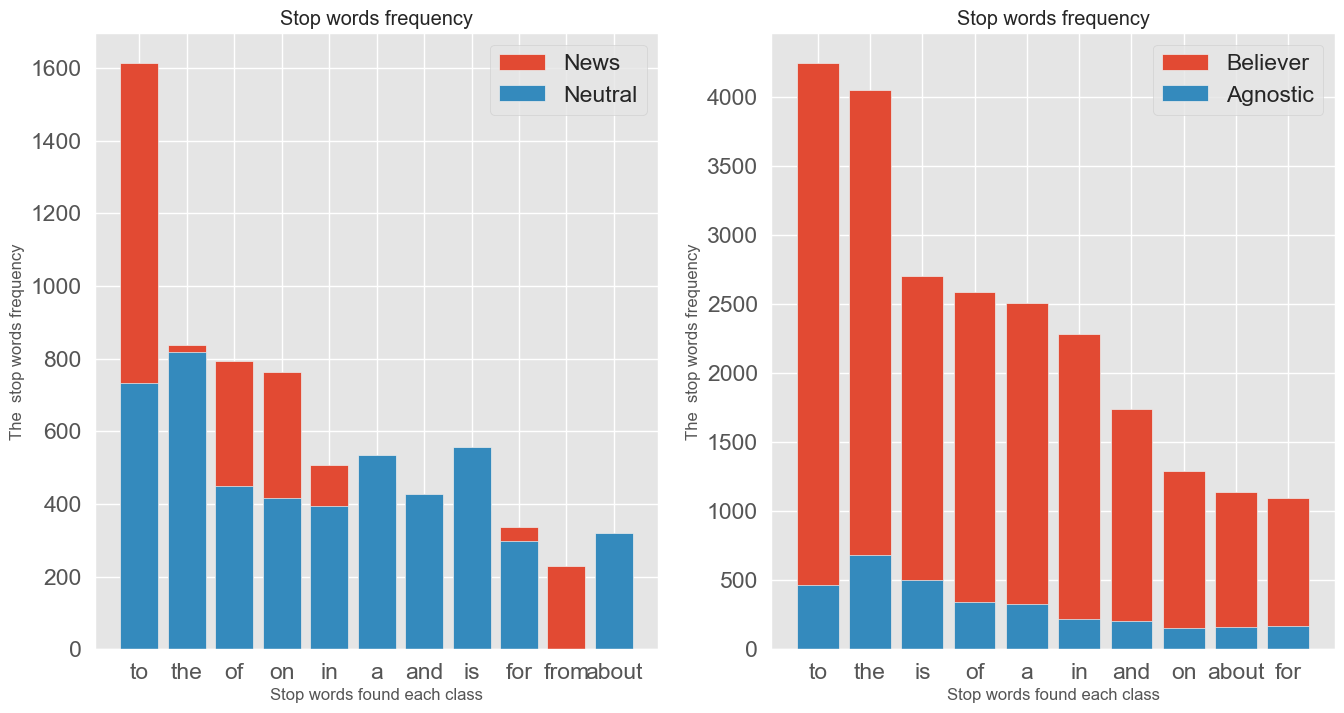

In [43]:
#ploting the graphs
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.bar(x2,y2)
plt.title("Stop words frequency")
plt.ylabel('The  stop words frequency')
plt.xlabel('Stop words found each class')
plt.subplot(1, 2, 2)
plt.bar(x1, y1)
plt.title("Stop words frequency")
plt.ylabel('The  stop words frequency')
plt.xlabel('Stop words found each class')
plt.subplot(1, 2 , 1)
plt.bar(x0,y0)
plt.legend(['News','Neutral'])
plt.subplot(1 , 2, 2)
plt.bar(x3,y3)
plt.legend(['Believer','Agnostic'])

In [44]:
df_copy = df.copy()
df_copy.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,19,12
1,1,It's not like we lack evidence of anthropogenic global warming,126103,10,1
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,19,12
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,15,8
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,18,8


In [45]:
#using regular expressions to remove tagy symbols
def remove_pattern(input_txt, pattern):
    """
    this function checks for patterns in the input_txt and removes them
    """
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [46]:
#applyng the funtion above to remove patterns on the message column
df_copy['message'] = np.vectorize(remove_pattern)(df_copy['message'], "@[\w]*") 

In [47]:
def  clean_text(df, text_field):
    """
    this function takes in a dataframe,text field and removes urls from the text field then return a dataframe with urls removed form the text field
    """
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
#test_clean = clean_text(clean_test_df, "message")
df_clean = clean_text(df_copy,"message")


In [48]:
#A function that removes punctuations
def remove_punctuations(text):
    table = str.maketrans("","",string.punctuation)
    txt = text.translate(table)
    return txt
#removing punctuationd from the message column
df_clean["message"] = df_clean['message'].apply(remove_punctuations)

In [49]:
#A function that removes stop words 
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    r = " ".join(text)
    return r
#removing stop words from the message column
df_clean["message"]=df_clean["message"].apply(remove_stopwords)
#visualing the cleaned dataframe
df_clean.head()

,sentiment,message,tweetid,word_count,punct_count
0,1,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait via,625221,19,12
1,1,like lack evidence anthropogenic global warming,126103,10,1
2,2,researchers say three years act climate change late,698562,19,12
3,1,todayinmaker wired 2016 pivotal year war climate change,573736,15,8
4,1,2016 racist sexist climate change denying bigot leading polls electionnight,466954,18,8


In [50]:
# Sample text cleaning function
def clean_text(text):
    # Add spaces between words where needed
    text = re.sub(r"(\d+)([a-zA-Z]+)", r"\1 \2", text)  # Add space after numbers
    text = re.sub(r"([a-zA-Z]+)(\d+)", r"\1 \2", text)  # Add space before numbers

    # Convert text to lowercase
    text = text.lower()

    # Remove unnecessary characters or punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

# Assuming df is your existing DataFrame and 'text_column' is the column to clean
df_clean['message'] = df_clean['message'].apply(clean_text)

In [51]:
df_clean["message"][3088]

'500 yearold clams tell us climate change'

In [52]:
df_clean.to_csv('df_clean1.csv', index=False)

In [53]:
pd.set_option('display.max_colwidth', None)

In [54]:
df_clean[["message", "sentiment"]] 

,message,sentiment
0,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait via,1
1,like lack evidence anthropogenic global warming,1
2,researchers say three years act climate change late,2
3,todayinmaker wired 2016 pivotal year war climate change,1
4,2016 racist sexist climate change denying bigot leading polls electionnight,1
...,...,...
15814,took material global warming lgbt rights health care theyre hocking melanias qvc,1
15815,climate change could breaking 200 millionyearold relationship,2
15816,notiven rt nytimesworld trump actually believe climate change rick perry joins aides,0
15817,hey liberals climate change crap hoax ties agenda 2030 the climate changed,-1


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Activation
import pickle

# Assume df_clean is your DataFrame with 'message' and 'sentiment' columns
# df_clean = pd.read_csv('your_data.csv') # Uncomment and modify this line to load your data

# Map sentiment values from [-1, 0, 1, 2] to [0, 1, 2, 3]
sentiment_mapping = {-1: 0, 0: 1, 1: 2, 2: 3}
df_clean['sentiment'] = df_clean['sentiment'].map(sentiment_mapping)

# Verify mapping
print("Mapped Sentiment Values:")
print(df_clean['sentiment'].value_counts())

# Split the data
X = df_clean['message']
y = df_clean['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify train and test splits
print("Train Sentiment Distribution:")
print(y_train.value_counts())
print("Test Sentiment Distribution:")
print(y_test.value_counts())

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(x) for x in X_train_seq)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))  # 4 classes: 0, 1, 2, 3
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model in the recommended Keras format
model.save('sentiment_lstm_model.keras')

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save max_length for use in the Streamlit app
with open('max_length.pkl', 'wb') as handle:
    pickle.dump(max_length, handle)

# Function to preprocess and predict new text
def predict_sentiment(text):
    # Load the tokenizer
    with open('tokenizer.pkl', 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    # Load max_length
    with open('max_length.pkl', 'rb') as handle:
        max_length = pickle.load(handle)
    
    # Load the model
    model = load_model('sentiment_lstm_model.keras')
    
    # Recompile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Preprocess the text
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_length, padding='post')
    
    # Make prediction
    prediction = model.predict(text_pad)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Map predicted class back to descriptive sentiment labels
    reverse_sentiment_mapping = {0: 'Agnostic', 1: 'Neutral', 2: 'Believer', 3: 'News'}
    predicted_sentiment = reverse_sentiment_mapping[predicted_class]
    
    return predicted_sentiment

# Test the function with new text
new_text = "500 yearold clams tell us climate change"
predicted_sentiment = predict_sentiment(new_text)
print(f"Predicted sentiment for '{new_text}': {predicted_sentiment}")


Mapped Sentiment Values:
sentiment
2    8530
3    3640
1    2353
0    1296
Name: count, dtype: int64
Train Sentiment Distribution:
sentiment
2    6775
3    2934
1    1928
0    1018
Name: count, dtype: int64
Test Sentiment Distribution:
sentiment
2    1755
3     706
1     425
0     278
Name: count, dtype: int64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5212 - loss: 1.1992 - val_accuracy: 0.5543 - val_loss: 1.0434
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6145 - loss: 0.9152 - val_accuracy: 0.6646 - val_loss: 0.8386
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7860 - loss: 0.5892 - val_accuracy: 0.6756 - val_loss: 0.8596
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8579 - loss: 0.3925 - val_accuracy: 0.6883 - val_loss: 0.8800
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9018 - loss: 0.3098 - val_accuracy: 0.6891 - val_loss: 1.1035
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9335 - loss: 0.2175 - val_accuracy: 0.6796 - val_loss: 1.2694
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9528 - loss: 0.1648 - val_accuracy: 0.6831 - val_loss: 1.3226
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9662 - loss: 0.1247 - val_accuracy: 0.696

In [56]:
print(nmhj)

NameError: name 'nmhj' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Activation
import pickle

# Map sentiment values from [-1, 0, 1, 2] to [0, 1, 2, 3]
sentiment_mapping = {-1: 0, 0: 1, 1: 2, 2: 3}
df_clean['sentiment'] = df_clean['sentiment'].map(sentiment_mapping)

# Verify mapping
print("Mapped Sentiment Values:")
print(df_clean['sentiment'].value_counts())

# Split the data
X = df_clean['message']
y = df_clean['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify train and test splits
print("Train Sentiment Distribution:")
print(y_train.value_counts())
print("Test Sentiment Distribution:")
print(y_test.value_counts())

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(x) for x in X_train_seq)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))  # 4 classes: 0, 1, 2, 3
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model
model.save('sentiment_lstm_model.h5')

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save max_length for use in the Streamlit app
with open('max_length.pkl', 'wb') as handle:
    pickle.dump(max_length, handle)

Mapped Sentiment Values:
sentiment
2    8530
3    3640
1    2353
0    1296
Name: count, dtype: int64
Train Sentiment Distribution:
sentiment
2    6775
3    2934
1    1928
0    1018
Name: count, dtype: int64
Test Sentiment Distribution:
sentiment
2    1755
3     706
1     425
0     278
Name: count, dtype: int64
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5326 - loss: 1.1769 - val_accuracy: 0.6456 - val_loss: 0.8946
Epoch 2/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7080 - loss: 0.7682 - val_accuracy: 0.6831 - val_loss: 0.8323
Epoch 3/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8091 - loss: 0.4954 - val_accuracy: 0.6744 - val_loss: 0.9348
Epoch 4/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8500 - loss: 0.3790 - val_accuracy: 0.6796 - val_loss: 0.9860
Epoch 5/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9110 - loss: 0.2764 - val_accuracy: 0.6812 - val_loss: 1.0495
Epoch 6/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9465 - loss: 0.2004 - val_accuracy: 0.6883 - val_loss: 1.1629
Epoch 7/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9648 - loss: 0.1394 - val_accuracy: 0.6938 - val_loss: 1.3260
Epoch 8/10
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9711 - loss: 0.1121 - val_accuracy: 0.689

Test Accuracy: 0.6767


In [ ]:
# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Function to preprocess and predict new text
def predict_sentiment(text):
    # Load the tokenizer
    with open('tokenizer.pkl', 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    # Load the model
    model = load_model('sentiment_lstm_model.h5')
    
    # Recompile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Preprocess the text
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_length, padding='post')
    
    # Make prediction
    prediction = model.predict(text_pad)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Map predicted class back to descriptive sentiment labels
    reverse_sentiment_mapping = {0: 'Agnostic', 1: 'Neutral', 2: 'Believer', 3: 'News'}
    predicted_sentiment = reverse_sentiment_mapping[predicted_class]
    
    return predicted_sentiment

# Test the function with new text
new_text = "500 yearold clams tell us climate change"
predicted_sentiment = predict_sentiment(new_text)
print(f"Predicted sentiment for '{new_text}': {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted sentiment for '500 yearold clams tell us climate change': News
